# Student Grades Prediction dataset taken from Kaggle


In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

In [2]:
# Reading data
df = pd.read_csv('/content/drive/MyDrive/DataScience/Dataset/KAGGLE/StudentGrades/results.csv')

In [3]:
df.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [4]:
# Shape of dataset
print(f'Rows:{df.shape[0]}', f'Columns:{df.shape[1]}')

Rows:1000 Columns:10


In [5]:
# Removing first irrelevant column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Now the last column in Division, which is of no use. It won't give any insights as comapred to others. Hence dropping it too.
df.drop(['Div'], axis=1, inplace=True)

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Hindi      1000 non-null   int64
 1   English    1000 non-null   int64
 2   Science    1000 non-null   int64
 3   Maths      1000 non-null   int64
 4   History    1000 non-null   int64
 5   Geograpgy  1000 non-null   int64
 6   Total      1000 non-null   int64
 7   Results    1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [8]:
df.describe()

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,51.645000,50.110000,49.440000,49.553000,49.03400,50.028000,299.810000,0.350000
std,29.471912,28.048505,28.921114,28.632447,28.76975,28.710268,71.865239,0.477208
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,0.000000
25%,26.000000,26.000000,25.000000,25.750000,24.00000,26.000000,254.000000,0.000000
50%,53.000000,50.500000,50.000000,49.000000,49.00000,49.000000,296.000000,0.000000
75%,77.000000,75.000000,73.250000,74.000000,73.25000,75.000000,349.250000,1.000000
max,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,505.000000,1.000000


In [9]:
df.isna().sum()

Hindi        0
English      0
Science      0
Maths        0
History      0
Geograpgy    0
Total        0
Results      0
dtype: int64

In [10]:
df.Results.value_counts()

0    650
1    350
Name: Results, dtype: int64

## Defining the variables

In [11]:
X = df.drop(['Results'], axis=1)        # Independant Variable / Features
y = df['Results']                       # Dependant Variable / Target

## Getting important features

In [12]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [13]:
model.feature_importances_

array([0.10289563, 0.10437479, 0.10729744, 0.10698713, 0.11149982,
       0.09570456, 0.37124063])

## Visualizing Important Features

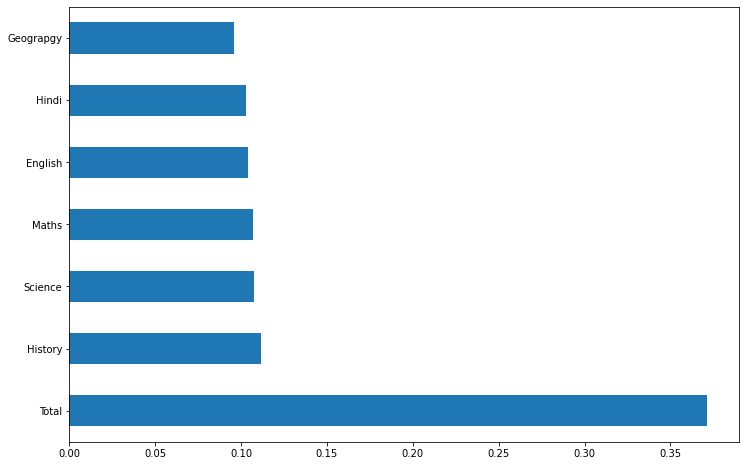

In [14]:
plt.figure(figsize=(12,8))
impft = pd.Series(model.feature_importances_, index=X.columns)
impft.nlargest(20).plot(kind='barh')
plt.show()

### As all the columns are numerical type, we don't need to do any OneHotEncoding or LabelEncoding

### Standard Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols_to_scale = ['Hindi', 'English', 'Science', 'Maths', 'History', 'Geograpgy', 'Total']
df[cols_to_scale] = sc.fit_transform(df[cols_to_scale])

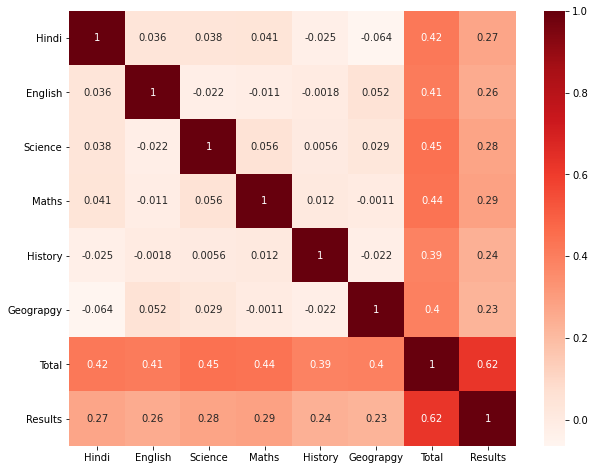

In [16]:
# Visualizing the correlation between the features

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

# **BUILDING MODEL**

In [17]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)      # 80% train data, 20% test data

## **LOGISTIC REGRESSION**
---

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=42)

penalty = ['l1', 'l2', 'elasticnet', 'none']
class_weight = [None, 'balanced']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = np.arange(100, 500, 100)
C = [100, 10, 1.0, 0.1, 0.01]
multi_class = ['auto', 'ovr', 'multinomial']

log_params = dict(penalty = penalty,
                  class_weight = class_weight,
                  solver = solver,
                  max_iter = max_iter,
                  C = C,
                  multi_class = multi_class)

### *Finding the best params*

In [21]:
mod_gs_log = GridSearchCV(estimator=log, param_grid=log_params, verbose=1, n_jobs=-1, cv=3)
mod_gs_log.fit(X_train, y_train)
bp_log = mod_gs_log.best_params_
bp_log

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 5848 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  1.3min finished


{'C': 1.0,
 'class_weight': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

### *Training with best parameters*

In [22]:
mod_log = LogisticRegression(C=bp_log['C'], class_weight=bp_log['class_weight'], max_iter=bp_log['max_iter'], multi_class=bp_log['multi_class'], 
                             penalty=bp_log['penalty'], solver=bp_log['solver'])
mod_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
ypred_log = mod_log.predict(X_test)

In [24]:
# import metric libraries
from sklearn.metrics import mean_squared_error as mse
from math import sqrt as r

In [25]:
# Metrics for Logistic Regression

rmse_log = r(mse(y_test, ypred_log))
print('RMSE Log:', rmse_log)

RMSE Log: 0.469041575982343


## **SGD CLASSIFIER**
---



In [27]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100]
max_iter = np.arange(200, 1000, 200)

sgd_params = dict(loss = loss,
                  penalty = penalty,
                  alpha = alpha,
                  learning_rate = learning_rate, 
                  class_weight = class_weight, 
                  eta0 = eta0,
                  max_iter = max_iter)

### *Finding the best params*

In [28]:
mod_gs_sgd = GridSearchCV(estimator=sgd, param_grid=sgd_params, verbose=1, n_jobs=-1, cv=3)
mod_gs_sgd.fit(X_train, y_train)
bp_sgd = mod_gs_sgd.best_params_
bp_sgd

Fitting 3 folds for each of 17280 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 13756 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 24956 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 39356 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 51840 out of 51840 | elapsed:  3.6min finished


{'alpha': 10,
 'class_weight': {0: 0.4, 1: 0.6},
 'eta0': 10,
 'learning_rate': 'adaptive',
 'loss': 'perceptron',
 'max_iter': 200,
 'penalty': 'elasticnet'}

### *Training with best parameters*

In [29]:
mod_sgd = SGDClassifier(loss=bp_sgd['loss'], penalty=bp_sgd['penalty'], max_iter=bp_sgd['max_iter'], learning_rate=bp_sgd['learning_rate'], eta0=bp_sgd['eta0'],
                        alpha=bp_sgd['alpha'])
mod_sgd.fit(X_train, y_train)

SGDClassifier(alpha=10, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=10, fit_intercept=True, l1_ratio=0.15,
              learning_rate='adaptive', loss='perceptron', max_iter=200,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
ypred_sgd = mod_sgd.predict(X_test)

In [31]:
# Metrics for SGD Classifier

rmse_sgd = r(mse(y_test, ypred_sgd))
print('RMSE SGD:', rmse_sgd)

RMSE SGD: 0.4527692569068708


## **DECISION TREE CLASSIFIER**
---

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1, 20, 2)
min_samples_split = np.arange(2, 10)
min_samples_leaf = np.arange(2, 10)
max_features = [None, 'auto', 'sqrt', 'log2']

dtc_params = dict(criterion = criterion,
                  splitter = splitter,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  max_features = max_features)

### *Finding the best params*

In [33]:
mod_gs_dtc = GridSearchCV(estimator = dtc, param_grid = dtc_params, verbose = 1, n_jobs = -1)
mod_gs_dtc.fit(X_train, y_train)
bp_dtc = mod_gs_dtc.best_params_
bp_dtc

Fitting 5 folds for each of 10240 candidates, totalling 51200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11260 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 27260 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 49660 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 51200 out of 51200 | elapsed:  2.1min finished


{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

### *Training with best parameters*

In [34]:
mod_dtc = DecisionTreeClassifier(max_depth=bp_dtc['max_depth'], min_samples_leaf=bp_dtc['min_samples_leaf'], criterion=bp_dtc['criterion'],
                                 max_features=bp_dtc['max_features'], min_samples_split=bp_dtc['min_samples_split'], splitter=bp_dtc['splitter'])
mod_dtc.fit(X_train, y_train)
ypred_dtc = mod_dtc.predict(X_test)

In [35]:
# Metrics for Decision Tree Classifier

rmse_dtc = r(mse(y_test, ypred_dtc))
print('RMSE DTC:', rmse_dtc)

RMSE DTC: 0.324037034920393


## **RIDGE CLASSIFIER**
---

In [36]:
from sklearn.linear_model import RidgeClassifier

rid = RidgeClassifier(random_state=42)

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
class_weight = ['balanced', None]
max_iter = np.arange(200, 2000, 200)

rid_params = dict(alpha = alpha,
                  max_iter = max_iter,
                  class_weight = class_weight,
                  solver = solver)

### *Finding the best params*

In [37]:
mod_gs_rid = GridSearchCV(estimator = rid, param_grid = rid_params, verbose = 1, n_jobs = -1)
mod_gs_rid.fit(X_train, y_train)
bp_rid = mod_gs_rid.best_params_
bp_rid

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5040 out of 5040 | elapsed:   16.1s finished


{'alpha': 0.0001, 'class_weight': None, 'max_iter': 200, 'solver': 'auto'}

### *Training with best parameters*

In [38]:
mod_rid = RidgeClassifier(alpha=bp_rid['alpha'], class_weight=bp_rid['class_weight'], max_iter=bp_rid['max_iter'], solver=bp_rid['solver'])

mod_rid.fit(X_train, y_train)
ypred_rid = mod_rid.predict(X_test)

In [39]:
# Metrics for Ridge Classifier

rmse_rid = r(mse(y_test, ypred_rid))
print('RMSE RID:', rmse_rid)

RMSE RID: 0.4636809247747852


## **K-Nearest Neighbors (KNN)**
---

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

n_neighbors = np.arange(1, 21, 2)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.arange(0, 50, 5)
metric = ['euclidean', 'manhattan', 'minkowski']

knc_params = dict(n_neighbors = n_neighbors,
                  weights = weights,
                  algorithm = algorithm,
                  leaf_size = leaf_size,
                  metric = metric)

### *Finding the best params*

In [41]:
mod_gs_knc = GridSearchCV(estimator = knc, param_grid = knc_params, verbose = 1, n_jobs = -1)
mod_gs_knc.fit(X_train, y_train)
bp_knc = mod_gs_knc.best_params_
bp_knc

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 11260 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:   57.9s finished


{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'metric': 'manhattan',
 'n_neighbors': 11,
 'weights': 'distance'}

### *Training with best params*

In [42]:
mod_knc = KNeighborsClassifier(algorithm=bp_knc['algorithm'], leaf_size=bp_knc['leaf_size'], metric=bp_knc['metric'], n_neighbors=bp_knc['n_neighbors'],
                          weights=bp_knc['weights'])

mod_knc.fit(X_train, y_train)
ypred_knc = mod_knc.predict(X_test)

In [43]:
# Metrics for KNeighbors Classifier

rmse_knc = r(mse(y_test, ypred_knc))
print('RMSE KNC:', rmse_knc)

RMSE KNC: 0.33166247903553997


## **RANDOM FOREST**
---

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

n_estimators = [2, 4, 8, 16, 32, 64, 100]
max_features = ['sqrt', 'log2', 'auto']
criterion = ['gini', 'entropy']
max_depth = np.arange(1, 16, 2)
min_samples_split = [0.01, 0.01, 0.1, 1.0]
min_samples_leaf = [0.01, 0.01, 0.1, 1.0]
class_weight = ['balanced', 'balanced_subsample']

rfc_params = dict(n_estimators = n_estimators,
                  max_features = max_features,
                  criterion = criterion,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  class_weight = class_weight)

### *Finding the best params*

In [45]:
mod_gs_rfc = GridSearchCV(estimator = rfc, param_grid = rfc_params, verbose = 1, n_jobs = -1)
mod_gs_rfc.fit(X_train, y_train)
bp_rfc = mod_gs_rfc.best_params_
bp_rfc

Fitting 5 folds for each of 10752 candidates, totalling 53760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 25500 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 32300 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 39900 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 48300 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 53760 out of 53760 | elapsed: 32.0min finished


{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 16}

### *Training with best params*

In [46]:
mod_rfc = RandomForestClassifier(n_estimators=bp_rfc['n_estimators'], max_features=bp_rfc['max_features'], criterion=bp_rfc['criterion'],
                  max_depth=bp_rfc['max_depth'], min_samples_split=bp_rfc['min_samples_split'], min_samples_leaf=bp_rfc['min_samples_leaf'],
                  class_weight=bp_rfc['class_weight'])

mod_rfc.fit(X_train, y_train)
ypred_rfc = mod_rfc.predict(X_test)

In [47]:
# Metrics for Random Forest Classifier

rmse_rfc = r(mse(y_test, ypred_rfc))
print('RMSE RFC:', rmse_rfc)

RMSE RFC: 0.282842712474619


## **ADA-BOOST CLASSIFIER**
---

In [50]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)

algorithm = ['SAMME', 'SAMME.R']
n_estimators = [10, 50, 100, 200]
learning_rate = [10, 1, 0.1, 0.01, 0.001]

abc_params = dict(algorithm = algorithm,
                 n_estimators = n_estimators,
                 learning_rate = learning_rate)

### *Finding the best params*

In [51]:
mod_gs_abc = GridSearchCV(estimator = abc, param_grid = abc_params, verbose = 1, n_jobs = -1)
mod_gs_abc.fit(X_train, y_train)
bp_abc = mod_gs_abc.best_params_
bp_abc

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.7s finished


{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}

### *Training with best params*

In [58]:
mod_abc = AdaBoostClassifier(algorithm=bp_abc['algorithm'], n_estimators=bp_abc['n_estimators'], learning_rate=0.1)

mod_abc.fit(X_train, y_train)
ypred_abc = mod_abc.predict(X_test)

In [59]:
# Metrics for Ada Boost Classifier

rmse_abc = r(mse(y_test, ypred_abc))
print('RMSE ABC:', rmse_abc)

RMSE ABC: 0.3872983346207417


## **SUPPORT VECTOR CLASSIFIER**
---

#### *This is not working properly on my machine, so I'll skip SVC*

In [62]:
# from sklearn.svm import SVC

# svc = SVC(random_state=42)

# C = [100, 10, 1.0, 0.1, 0.01]
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# gamma = ['scale', 'auto']
# # decision_function_shape = ['ovo', 'ovr']

# svc_params = dict(C = C,
#                   kernel = kernel,
#                   gamma = gamma)
#                   # decision_function_shape = decision_function_shape)

### *Finding the best params*

In [ ]:
# mod_gs_svc = GridSearchCV(estimator = svc, param_grid = svc_params, verbose = 1, n_jobs = -1, cv=3)
# mod_gs_svc.fit(X_train, y_train)
# bp_svc = mod_gs_svc.best_params_
# bp_svc

### *Training with best params*

In [ ]:
# mod_svc = SVC(C=bp_svc['C'], kernel=bp_svc['kernel'], gamma=bp_svc['gamma'])
# # , decision_funtion_shape=bp_svc['decision_function_shape'])

# mod_svc.fit(X_train, y_train)
# ypred_svc = mod_svc.predict(X_test)

In [ ]:
# # Metrics for Support Vaector Classifier

# rmse_svc = r(mse(y_test, ypred_svc))
# print('RMSE SVC:', rmse_svc)

## **CATEGORICAL NAIVE BAYES**
---

In [69]:
from sklearn.naive_bayes import CategoricalNB

mod_cnb = CategoricalNB()

mod_cnb.fit(X_train, y_train)
ypred_cnb = mod_cnb.predict(X_test)

In [70]:
# Metrics for Categorical Naive Bayes

rmse_cnb = r(mse(y_test, ypred_cnb))
print('RMSE CNB:', rmse_cnb)

RMSE CNB: 0.469041575982343


## Comparing all the RMSE values:

In [71]:
print('RMSE ABC:', rmse_abc)
print('RMSE CNB:', rmse_cnb)
print('RMSE DTC:', rmse_dtc)
print('RMSE KNC:', rmse_knc)
print('RMSE LOG:', rmse_log)
print('RMSE RFC:', rmse_rfc)
print('RMSE RID:', rmse_rid)
print('RMSE SGD:', rmse_sgd)

RMSE ABC: 0.3872983346207417
RMSE CNB: 0.469041575982343
RMSE DTC: 0.324037034920393
RMSE KNC: 0.33166247903553997
RMSE LOG: 0.469041575982343
RMSE RFC: 0.282842712474619
RMSE RID: 0.4636809247747852
RMSE SGD: 0.4527692569068708


### As seen here, the Random Forest has the lowest RMSE value. Hence we will use it for prediction the output.

In [78]:
# Saving the RFC model
import pickle

rfc_model = 'rfc_model.sav'
pickle.dump(mod_rfc, open(rfc_model, 'wb'))

# **TEST DATA**
---

In [80]:
# Loading the saved RFC model
rfc_loaded = pickle.load(open(rfc_model, 'rb'))

In [82]:
# Testing on the Test Dataset
test_model = rfc_loaded.fit(X_train, y_train)
test_ypred = test_model.predict(X_test)

In [83]:
# Metrics for final output

rmse_output = r(mse(y_test, test_ypred))
print('RMSE Output:', rmse_output)

RMSE Output: 0.282842712474619


In [101]:
# Accuracy score metrics
from sklearn.metrics import accuracy_score

accuracy_score(y_test, test_ypred)

0.92

As we used the best model Random Forest Classifier, we can conclude that ***0.92 accuracy*** and ***RMSE 0.282842*** is the best score we can get by using these models. However note that by tweaking the parameters more can result in different outputs.